In [1]:
import hyperopt

print("hyperopt.__version__", hyperopt.__version__)

import sklearn

print("sklearn.__version__", sklearn.__version__)
#pip install scikit-learn==1.0.2  다운그레이드 해서 테스트하기

import pandas
print("pandas.__version__", pandas.__version__)
#pip install pandas==1.3.5

import xgboost
print("xgboost.__version__", xgboost.__version__)

hyperopt.__version__ 0.2.7
sklearn.__version__ 1.0.2
pandas.__version__ 1.3.5
xgboost.__version__ 1.5.0


In [7]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
X_features =  dataset.data
y_label = dataset.target



In [4]:
import pandas as pd
df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df['target'] = y_label
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

# 1. Python native XGBoost
#2. sklearn.xgboost

In [6]:
X_features = df.iloc[:, :-1]
y_label = df.iloc[:, -1]

In [9]:
#훈련 8: 시험 2
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156 )

#훈련9 : 검증 1
X_tr,  X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156 )


In [10]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr) 
dval = xgb.DMatrix(data=X_val, label=y_val) 
dtest = xgb.DMatrix(data=X_test, label=y_test) 

In [11]:
params = {
    'max_depth':3,
    'eta':0.05, #학습율
    'objective':'binary:logistic',
    'eval_metric':'logloss'
}
num_rounds = 400

In [12]:
eval_list = [(dtr, 'train'), (dval,'eval')]

xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds,\
                early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52929
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31893	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

# 예측 결과 확률

In [13]:
pred_probs = xgb_model.predict(dtest)
pred_probs

array([0.8447872 , 0.00842587, 0.6796298 , 0.08113331, 0.9751338 ,
       0.9988939 , 0.9983084 , 0.9980654 , 0.99637896, 0.00138468,
       0.00252283, 0.00154995, 0.99780875, 0.99829525, 0.99691856,
       0.9965521 , 0.99120796, 0.9982718 , 0.9970682 , 0.9978916 ,
       0.00202923, 0.10774372, 0.00137198, 0.9989255 , 0.00107862,
       0.7800014 , 0.00295459, 0.00154995, 0.9966723 , 0.05379276,
       0.958738  , 0.00149019, 0.9700533 , 0.8656249 , 0.00678389,
       0.00140975, 0.97810876, 0.99713576, 0.24059245, 0.9972307 ,
       0.35760084, 0.99708337, 0.9919429 , 0.99659145, 0.9962838 ,
       0.9179466 , 0.036952  , 0.997417  , 0.99325067, 0.99804085,
       0.99648905, 0.00236221, 0.9979361 , 0.99784875, 0.9960328 ,
       0.99391055, 0.9984106 , 0.99635327, 0.9967404 , 0.896291  ,
       0.9967794 , 0.9520696 , 0.00349248, 0.00202715, 0.9980167 ,
       0.98225844, 0.00349248, 0.99056447, 0.9972249 , 0.9978916 ,
       0.00297725, 0.99731344, 0.00163038, 0.98887384, 0.99624

# 예측 클래스값

In [14]:
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
preds[:10]

[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_probs=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)

    print(confusion)
    print('*'*20)
    print(accuracy, precision, recall, f1, roc_auc)

In [16]:
get_clf_eval(y_test, preds, pred_probs )

[[34  3]
 [ 2 75]]
********************
0.956140350877193 0.9615384615384616 0.974025974025974 0.967741935483871 0.9464724464724464


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 결정 트리 모델 생성 및 학습
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f'결정 트리 정확도: {dt_accuracy:.4f}')

# 랜덤 포레스트 모델 생성 및 학습
rf_clf = RandomForestClassifier(random_state=156)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'랜덤 포레스트 정확도: {rf_accuracy:.4f}')

결정 트리 정확도: 0.9386
랜덤 포레스트 정확도: 0.9474


plot_importance()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

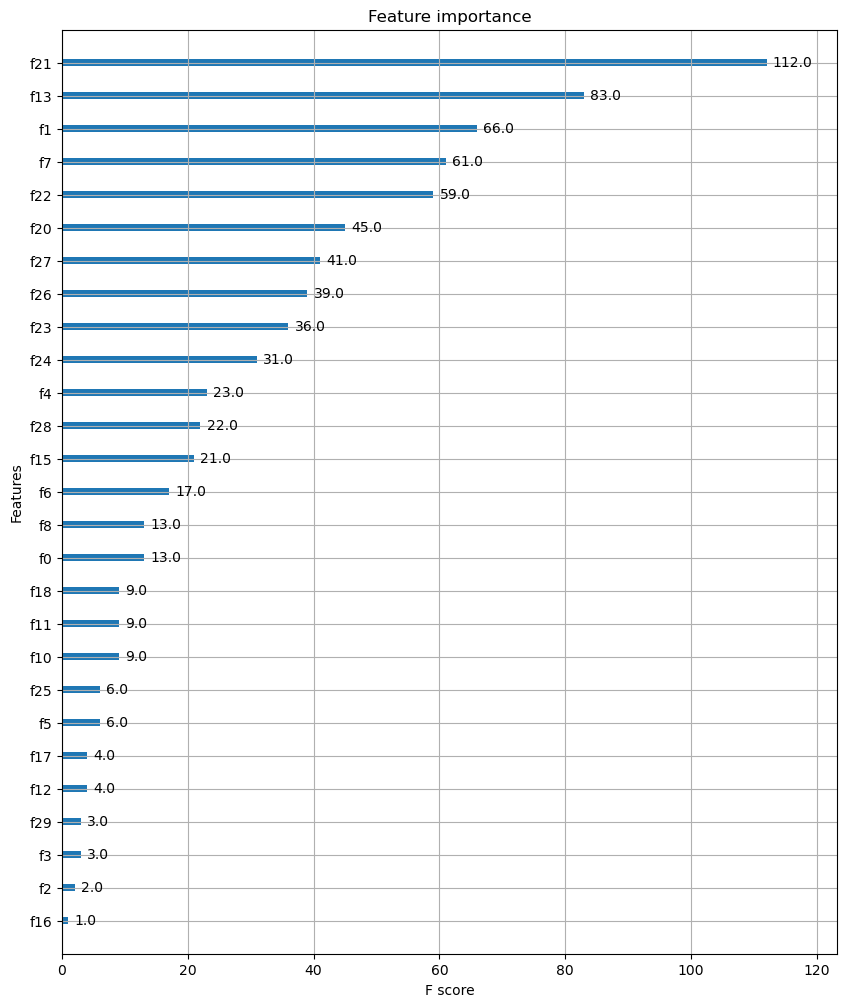

In [23]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

# 2. sklearn.xgboost

In [ ]:
params = {
    'max_depth':3,
    'eta':0.05, #학습율
    'objective':'binary:logistic',
    'eval_metric':'logloss'
}

In [26]:
from xgboost import XGBClassifier

In [ ]:
xgb_wrapper_model = XGBClassifier(n_estimators = 400, learning_rate=0.05, max_depth=3 )
xgb_wrapper_model.fit(X_train, y_train)
wr_pred = xgb_wrapper_model.predict(X_test)
wr_pred_proba = xgb_wrapper_model.predict_proba(X_test)

get_clf_eval(y_test, wr_pred, wr_pred_proba )

[16:18:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[34  3]
 [ 1 76]]
********************
0.9649122807017544 0.9620253164556962 0.987012987012987 0.9743589743589742 0.9529659529659528


c:\Users\ylee\anaconda3\envs\xgboost_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[34  3]
 [ 2 75]]
********************
0.956140350877193 0.9615384615384616 0.974025974025974 0.967741935483871 0.9464724464724464